In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/drive/MyDrive/data.csv')
X = data['text']
y = LabelEncoder().fit_transform(data['label'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

In [ ]:
max_len= 100
text_vectorizer = tf.keras.layers.TextVectorization(
     output_mode='int', pad_to_max_tokens=True,max_tokens=2500 , output_sequence_length=max_len, standardize='lower_and_strip_punctuation')
text_vectorizer.adapt(X)

In [ ]:
length = len(text_vectorizer.get_vocabulary()) + 1

In [ ]:
print(length)

2501


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=5)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input,Embedding, Dropout, GRU
import tensorflow as tf

In [ ]:
model = Sequential([
    Input((1,),dtype=tf.string),
    text_vectorizer,
    Embedding(2500,8, input_length=max_len),
    LSTM(16, activation='tanh'),
    Dense(1,activation='sigmoid')
]
)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
139/139 [==============================] - 13s 81ms/step - loss: 0.6369 - accuracy: 0.5981 - val_loss: 0.4880 - val_accuracy: 0.8064
Epoch 2/20
139/139 [==============================] - 2s 16ms/step - loss: 0.4961 - accuracy: 0.8065 - val_loss: 0.4225 - val_accuracy: 0.8417
Epoch 3/20
139/139 [==============================] - 2s 16ms/step - loss: 0.3385 - accuracy: 0.8857 - val_loss: 0.3550 - val_accuracy: 0.8632
Epoch 4/20
139/139 [==============================] - 2s 16ms/step - loss: 0.2437 - accuracy: 0.9235 - val_loss: 0.3680 - val_accuracy: 0.8606
Epoch 5/20
139/139 [==============================] - 2s 16ms/step - loss: 0.1850 - accuracy: 0.9398 - val_loss: 0.3522 - val_accuracy: 0.8748
Epoch 6/20
139/139 [==============================] - 2s 16ms/step - loss: 0.1493 - accuracy: 0.9571 - val_loss: 0.3076 - val_accuracy: 0.8827
Epoch 7/20
139/139 [==============================] - 2s 16ms/step - loss: 0.1189 - accuracy: 0.9698 - val_loss: 0.4237 - val_accuracy: 0.873

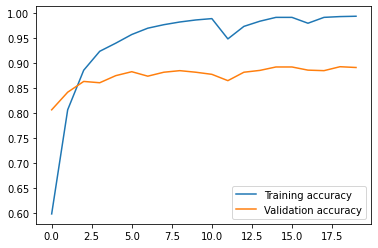

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(acc)
plt.plot(range(epochs),acc, label='Training accuracy')
plt.plot(range(epochs),val_acc,label='Validation accuracy')
plt.legend()
plt.show()

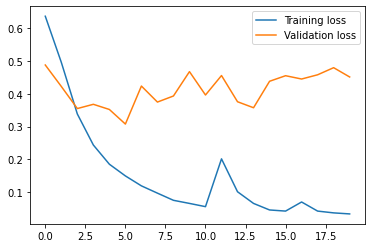

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(epochs),loss, label='Training loss')
plt.plot(range(epochs),val_loss,label='Validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test,np.round(pred)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       935
           1       0.90      0.89      0.89       966

    accuracy                           0.89      1901
   macro avg       0.89      0.89      0.89      1901
weighted avg       0.89      0.89      0.89      1901

